In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or 'retina'
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# dataset from ranked challenger last updated 2020
df = pd.read_csv("ranked_challenger.csv")
df

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [3]:
# columns for blue side
df.iloc[0: ,0:26]

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,22,56039,37001,440,56,11.2,105,4,31035,5675
1,4247155821,1317,1,0,0,0,1,0,2,0,...,31,60243,41072,531,63,12.6,111,3,26397,45303
2,4243963257,932,0,0,0,0,0,0,0,0,...,8,24014,22929,306,42,8.4,64,0,6567,5651
3,4241678498,2098,0,0,0,1,1,0,1,1,...,45,101607,63447,774,80,16.0,226,3,24718,31019
4,4241538868,2344,1,1,1,1,1,1,2,2,...,47,134826,74955,831,83,16.6,252,5,37161,95287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,50,99418,41437,438,60,12.0,106,8,20122,13309
26900,4157911901,970,0,1,1,0,1,0,3,0,...,36,61816,61221,346,65,13.0,28,5,32837,44640
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,19,51604,45013,568,63,12.6,132,4,18131,45242
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,66,93059,58160,640,76,15.2,168,7,75427,60486


In [4]:
df.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

In [5]:
# drop gameID and repeating features for red side
X = df.loc[:,["gameDuraton", "blueFirstBlood", "blueFirstTower", "blueFirstBaron", "blueFirstDragon", "blueFirstInhibitor",
          "blueDragonKills", "blueBaronKills", "blueTowerKills", "blueInhibitorKills", "blueWardPlaced", "blueWardkills",
         "blueKills", "blueDeath", "blueAssist", "blueChampionDamageDealt", "blueTotalGold", "blueTotalMinionKills",
         "blueTotalLevel", "blueAvgLevel", "blueJungleMinionKills", "blueKillingSpree", "blueTotalHeal", "blueObjectDamageDealt"]]

y = df["blueWins"]

### Split the data into test and training set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [7]:
# baseline rate of blueWin
np.mean(y_train)

0.49876875900199785

<AxesSubplot:>

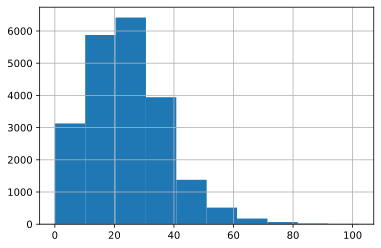

In [8]:
X_train["blueDeath"].hist()

### KNN and Cross Validation

In [33]:
# train on training set, and test on testing set
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8067273740940346


In [36]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores)

[0.80230398 0.78929766 0.78966927 0.80193237 0.7936803  0.81263941
 0.8260223  0.79814126 0.79330855 0.79814126]


In [37]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.8005136355661652


In [43]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

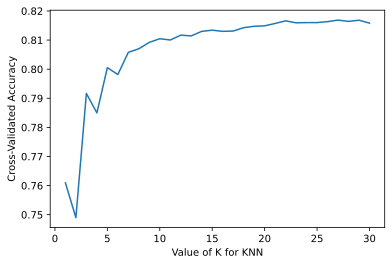

In [46]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

### GridSearchCV

In [48]:
# define the parameter values that should be searched
k_range = list(range(1, 100))

In [49]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

In [50]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [51]:
# fit the grid with data
grid.fit(X, y);

In [54]:
# view the complete results
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007011,0.001425,0.647422,0.036810,1,{'n_neighbors': 1},0.752880,0.758454,0.753995,0.763285,0.758364,0.771004,0.779182,0.765428,0.749071,0.757621,0.760928,0.008588,98
1,0.006400,0.000479,0.698010,0.029371,2,{'n_neighbors': 2},0.753252,0.739502,0.730955,0.747677,0.739777,0.769888,0.764312,0.751673,0.749442,0.743494,0.748997,0.011087,99
2,0.006371,0.000237,0.750929,0.004859,3,{'n_neighbors': 3},0.789669,0.785953,0.783724,0.790412,0.789591,0.803717,0.810781,0.788476,0.784015,0.790335,0.791667,0.008287,96
3,0.006269,0.000187,1.077075,0.014937,4,{'n_neighbors': 4},0.781865,0.771832,0.776663,0.784838,0.778810,0.804089,0.803717,0.788104,0.779926,0.779926,0.784977,0.010329,97
4,0.006446,0.000242,1.076831,0.017894,5,{'n_neighbors': 5},0.802304,0.789298,0.789669,0.801932,0.793680,0.812639,0.826022,0.798141,0.793309,0.798141,0.800514,0.010753,94


In [55]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 38}
Best estimator:  KNeighborsClassifier(n_neighbors=38)
Best score:  0.8170163798093327


### Searching multiple parameters simultaneously

In [69]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [70]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [71]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [72]:
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005333,0.001005,0.687330,0.087143,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.752880,0.758454,0.753995,0.763285,0.758364,0.771004,0.779182,0.765428,0.749071,0.757621,0.760928,0.008588,57
1,0.005450,0.000973,0.727325,0.090754,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.752880,0.758454,0.753995,0.763285,0.758364,0.771004,0.779182,0.765428,0.749071,0.757621,0.760928,0.008588,57
2,0.005741,0.001753,0.799090,0.012757,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.753252,0.739502,0.730955,0.747677,0.739777,0.769888,0.764312,0.751673,0.749442,0.743494,0.748997,0.011087,60
3,0.005438,0.000527,0.745697,0.003729,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.752880,0.758454,0.753995,0.763285,0.758364,0.771004,0.779182,0.765428,0.749071,0.757621,0.760928,0.008588,57
4,0.005500,0.000781,0.876185,0.010413,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.789669,0.785953,0.783724,0.790412,0.789591,0.803717,0.810781,0.788476,0.784015,0.790335,0.791667,0.008287,54


In [73]:
# examine the best model -- 27 neighbors and uniform weights whereas last was 30 neighbors
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 27, 'weights': 'distance'}
Best estimator:  KNeighborsClassifier(n_neighbors=27, weights='distance')
Best score:  0.8184286324095602
